In [1]:
# Import libraries
import numpy as np # library to handle data in a vectorized manner
import json # library to handle JSON files
import pandas as pd

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

from bs4 import BeautifulSoup

# Import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    certifi-2020.4.5.2         |   py36h9f0ad1d_0         152 KB  conda-forge
    geopy-1.22.0               |     pyh9f0ad1d_0          63 KB  conda-forge
    ca-certificates-2020.4.5.2 |       hecda079_0         147 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0           conda-forge
    geopy:          

In [2]:
# Download the dataset and read it into a pandas dataframe.

paris = pd.read_csv('https://raw.githubusercontent.com/AR-data-science/Coursera_Capstone/master/Arrondissements_.csv')
paris.head()

,CAR,NAME,NSQAR,CAR.1,CARINSEE,LAR,NSQCO,SURFACE,PERIMETRE,Geometry_X,Geometry_Y
0,3,Temple,750000003,3,3,3eme Ardt,750001537,1170882828,4519264,48.862872,2.360001
1,19,Buttes-Chaumont,750000019,19,19,19eme Ardt,750001537,6792651129,11253182,48.887076,2.384821
2,14,Observatoire,750000014,14,14,14eme Ardt,750001537,5614877309,10317483,48.829245,2.326542
3,10,Entrepot,750000010,10,10,10eme Ardt,750001537,2891739442,6739375,48.876130,2.360728
4,12,Reuilly,750000012,12,12,12eme Ardt,750001537,16314782637,24089666,48.834974,2.421325
5,16,Passy,750000016,16,16,16eme Ardt,750001537,16372542129,17416110,48.860392,2.261971
6,11,Popincourt,750000011,11,11,11eme Ardt,750001537,3665441552,8282012,48.859059,2.380058
7,2,Bourse,750000002,2,2,2eme Ardt,750001537,991153745,4554104,48.868279,2.342803
8,4,Hotel-de-Ville,750000004,4,4,4eme Ardt,750001537,1600585632,5420908,48.854341,2.357630
9,17,Batignolles-Monceau,750000017,17,17,17eme Ardt,750001537,5668834504,10775580,48.887327,2.306777


In [3]:
# Rename the necessary columns 'Geometry_X and Geometry_Y' etc...

# District : name of the central District for the Arrondissement
# Arrondissement : the Arrondissement or district number which is used to identify it
# Arrondissement_Fr : the descriptive French label for each Arrondissement

paris.rename(columns={'NAME': 'Neighborhood ', 'CAR': 'Arrondissement_Num', 'Geometry_X': 'Latitude', 'Geometry_Y': 'Longitude',  'LAR': 'French_Name'}, inplace=True)
paris.head()

,Arrondissement_Num,Neighborhood,NSQAR,CAR.1,CARINSEE,French_Name,NSQCO,SURFACE,PERIMETRE,Latitude,Longitude
0,3,Temple,750000003,3,3,3eme Ardt,750001537,1170882828,4519264,48.862872,2.360001
1,19,Buttes-Chaumont,750000019,19,19,19eme Ardt,750001537,6792651129,11253182,48.887076,2.384821
2,14,Observatoire,750000014,14,14,14eme Ardt,750001537,5614877309,10317483,48.829245,2.326542
3,10,Entrepot,750000010,10,10,10eme Ardt,750001537,2891739442,6739375,48.876130,2.360728
4,12,Reuilly,750000012,12,12,12eme Ardt,750001537,16314782637,24089666,48.834974,2.421325
5,16,Passy,750000016,16,16,16eme Ardt,750001537,16372542129,17416110,48.860392,2.261971
6,11,Popincourt,750000011,11,11,11eme Ardt,750001537,3665441552,8282012,48.859059,2.380058
7,2,Bourse,750000002,2,2,2eme Ardt,750001537,991153745,4554104,48.868279,2.342803
8,4,Hotel-de-Ville,750000004,4,4,4eme Ardt,750001537,1600585632,5420908,48.854341,2.357630
9,17,Batignolles-Monceau,750000017,17,17,17eme Ardt,750001537,5668834504,10775580,48.887327,2.306777


In [4]:
# Clean up the dataset to remove unnecessary columns.
# Some of the columns are for mapping software - not required here.

paris.drop(['NSQAR','CAR.1','CARINSEE','NSQCO','SURFACE', 'PERIMETRE' ], axis=1, inplace=True)
paris.head(
)

,Arrondissement_Num,Neighborhood,French_Name,Latitude,Longitude
0,3,Temple,3eme Ardt,48.862872,2.360001
1,19,Buttes-Chaumont,19eme Ardt,48.887076,2.384821
2,14,Observatoire,14eme Ardt,48.829245,2.326542
3,10,Entrepot,10eme Ardt,48.876130,2.360728
4,12,Reuilly,12eme Ardt,48.834974,2.421325
5,16,Passy,16eme Ardt,48.860392,2.261971
6,11,Popincourt,11eme Ardt,48.859059,2.380058
7,2,Bourse,2eme Ardt,48.868279,2.342803
8,4,Hotel-de-Ville,4eme Ardt,48.854341,2.357630
9,17,Batignolles-Monceau,17eme Ardt,48.887327,2.306777


In [5]:
# Retrieve the Latitude and Longitude for Paris
from geopy.geocoders import Nominatim 

address = 'Paris'

# Define the user_agent as Paris_explorer
geolocator = Nominatim(user_agent="Paris_explorer")

location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

print('The geographical coordinates of Paris France are {}, {}.'.format(latitude, longitude))

The geographical coordinates of Paris France are 48.8566969, 2.3514616.


In [6]:
# create map of Paris using the above latitude and longitude values
map_paris = folium.Map(location=[latitude, longitude], zoom_start=12)


# add markers to map
for lat, lng, label in zip(paris['Latitude'], paris['Longitude'], paris['French_Name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=25,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.3,
        parse_html=False).add_to(map_paris)  
    
map_paris

In [44]:
CLIENT_ID = 'MVKVAV43J4JDYG2SEB0R2MMMBTMEXBFNGK4OVJJ1VHW0QGHJ' # your Foursquare ID
CLIENT_SECRET = 'XDAZPYOFJ34FNXC40SDCY4H2ZGYQZD4Q3EEZTYPQKKHJRAB1' # your Foursquare Secret
VERSION = '20200609'


In [9]:
# Explore the first Neighborhood in our dataframe.
# Get the Neighborhood's French name.

paris.loc[0, 'French_Name']

'3eme Ardt'

In [10]:

neighborhood_latitude = paris.loc[0, 'Latitude'] # Neighborhood latitude value
neighborhood_longitude = paris.loc[0, 'Longitude'] # Neighborhood longitude value

neighborhood_name = paris.loc[0, 'French_Name'] # Neighborhood name

print('Latitude and longitude values of the neighborhood {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of the neighborhood 3eme Ardt are 48.86287238, 2.3600009859999997.


In [36]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

url = 'https://api.foursquare.com/v2/venues/explore?&client_id=MVKVAV43J4JDYG2SEB0R2MMMBTMEXBFNGK4OVJJ1VHW0QGHJ&client_secret=XDAZPYOFJ34FNXC40SDCY4H2ZGYQZD4Q3EEZTYPQKKHJRAB1&v=20200609&ll=48.86287238,2.3600009859999997&radius=500&limit=100'
# Send the GET request

results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5edf7e286001fe001be9a939'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Enfants-Rouges',
  'headerFullLocation': 'Enfants-Rouges, Paris',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 89,
  'suggestedBounds': {'ne': {'lat': 48.8673723845, 'lng': 2.3668285468065267},
   'sw': {'lat': 48.8583723755, 'lng': 2.353173425193473}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4d974096a2c654814aa6d353',
       'name': 'Mmmozza',
       'location': {'address': '57 rue de Bretagne',
        'lat': 48.86391016055883,
        'lng': 2.360590696334839,
        'labeledLatLngs': [{'label': 'display',
          'lat': 48.8639101605588

In [37]:
# clean the json and structure it into a pandas dataframe.

venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Mmmozza,Sandwich Place,48.863910,2.360591
1,Chez Alain Miam Miam,Sandwich Place,48.862369,2.361950
2,Square du Temple,Park,48.864475,2.360816
3,Marché des Enfants Rouges,Farmers Market,48.862806,2.361996
4,Chez Alain Miam Miam,Sandwich Place,48.862781,2.362064


In [38]:
# Check how many venues there are in 3eme Ardt within a radius of 500 meters

print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

89 venues were returned by Foursquare.


In [45]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION,
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['French_Name', 
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [46]:
# Create a new dataframe called paris_venues.

paris_venues = getNearbyVenues(names=paris['French_Name'],
                                   latitudes=paris['Latitude'],
                                   longitudes=paris['Longitude']
                                  )

3eme Ardt
19eme Ardt
14eme Ardt
10eme Ardt
12eme Ardt
16eme Ardt
11eme Ardt
2eme Ardt
4eme Ardt
17eme Ardt
18eme Ardt
1er Ardt
5eme Ardt
7eme Ardt
20eme Ardt
8eme Ardt
9eme Ardt
13eme Ardt
15eme Ardt
6eme Ardt


In [47]:
print(paris_venues.shape)
paris_venues.head()

(1264, 7)


,French_Name,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,3eme Ardt,48.862872,2.360001,Mmmozza,48.863910,2.360591,Sandwich Place
1,3eme Ardt,48.862872,2.360001,Chez Alain Miam Miam,48.862369,2.361950,Sandwich Place
2,3eme Ardt,48.862872,2.360001,Square du Temple,48.864475,2.360816,Park
3,3eme Ardt,48.862872,2.360001,Marché des Enfants Rouges,48.862806,2.361996,Farmers Market
4,3eme Ardt,48.862872,2.360001,Chez Alain Miam Miam,48.862781,2.362064,Sandwich Place


In [48]:
paris_venues.groupby('French_Name').count()

,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
French_Name,,,,,,
10eme Ardt,100,100,100,100,100,100
11eme Ardt,68,68,68,68,68,68
12eme Ardt,4,4,4,4,4,4
13eme Ardt,61,61,61,61,61,61
14eme Ardt,26,26,26,26,26,26
15eme Ardt,64,64,64,64,64,64
16eme Ardt,13,13,13,13,13,13
17eme Ardt,64,64,64,64,64,64
18eme Ardt,44,44,44,44,44,44


In [49]:
# Calculate how many unique categories there are.
print('There are {} unique venue categories.'.format(len(paris_venues['Venue Category'].unique())))

There are 199 unique venue categories.


In [50]:
# Analyze each of the Neighborhoods from the results

# one hot encoding
paris_onehot = pd.get_dummies(paris_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
paris_onehot['Neighborhood'] = paris_venues['French_Name'] 

# move neighborhood column to the first column
fixed_columns = [paris_onehot.columns[-1]] + list(paris_onehot.columns[:-1])
paris_onehot = paris_onehot[fixed_columns]

paris_onehot

,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Vietnamese Restaurant,Waterfront,Wine Bar,Wine Shop,Women's Store,Zoo,Zoo Exhibit
0,3eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,3eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,3eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,3eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [51]:
#Group rows by neighborhood and take the mean of the frequency of occurrence of each category
paris_grouped = paris_onehot.groupby('Neighborhood').mean().reset_index()

In [52]:
# Each  neighborhood with top 10 most common venues

num_top_venues = 10

for hood in paris_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = paris_grouped[paris_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----10eme Ardt----
                 venue  freq
0    French Restaurant  0.12
1                Hotel  0.06
2          Coffee Shop  0.05
3                 Café  0.04
4    Indian Restaurant  0.04
5               Bistro  0.04
6  Japanese Restaurant  0.03
7          Pizza Place  0.03
8    Korean Restaurant  0.02
9         Burger Joint  0.02


----11eme Ardt----
                 venue  freq
0    French Restaurant  0.12
1                 Café  0.06
2             Wine Bar  0.04
3          Supermarket  0.04
4           Restaurant  0.04
5          Pastry Shop  0.04
6         Cocktail Bar  0.03
7     Asian Restaurant  0.03
8   Italian Restaurant  0.03
9  Japanese Restaurant  0.03


----12eme Ardt----
                     venue  freq
0              Zoo Exhibit  0.25
1                      Zoo  0.25
2      Monument / Landmark  0.25
3              Supermarket  0.25
4              Pastry Shop  0.00
5                   Museum  0.00
6              Music Store  0.00
7  New American Restaurant  0.00
8   

In [53]:
#Put  data into a pandas dataframe and sort the venues in descending order
# First sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]


num_top_venues = 10
indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
        
# create a new dataframe
paris_venues_sorted = pd.DataFrame(columns=columns)
paris_venues_sorted['Neighborhood'] = paris_grouped['Neighborhood']

for ind in np.arange(paris_grouped.shape[0]):
    paris_venues_sorted.iloc[ind, 1:] = return_most_common_venues(paris_grouped.iloc[ind, :], num_top_venues)

paris_venues_sorted.head(20)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,10eme Ardt,French Restaurant,Hotel,Coffee Shop,Bistro,Café,Indian Restaurant,Japanese Restaurant,Pizza Place,Burger Joint,Wine Bar
1,11eme Ardt,French Restaurant,Café,Supermarket,Pastry Shop,Wine Bar,Restaurant,Pizza Place,Theater,Asian Restaurant,Cocktail Bar
2,12eme Ardt,Zoo Exhibit,Monument / Landmark,Supermarket,Zoo,Hostel,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Exhibit
3,13eme Ardt,Vietnamese Restaurant,Asian Restaurant,French Restaurant,Chinese Restaurant,Thai Restaurant,Juice Bar,Plaza,Cosmetics Shop,Bakery,Bus Stop
4,14eme Ardt,French Restaurant,Hotel,Food & Drink Shop,Bistro,Supermarket,Bus Stop,Bakery,Sushi Restaurant,Plaza,Tea Room
5,15eme Ardt,Hotel,French Restaurant,Italian Restaurant,Coffee Shop,Baby Store,Indian Restaurant,Brasserie,Bistro,Japanese Restaurant,Lebanese Restaurant
6,16eme Ardt,Lake,Plaza,Park,Pool,Bus Station,Trail,Bus Stop,Boat or Ferry,Art Museum,French Restaurant
7,17eme Ardt,French Restaurant,Hotel,Japanese Restaurant,Italian Restaurant,Bakery,Plaza,Café,Sushi Restaurant,Bar,Bistro
8,18eme Ardt,Bar,French Restaurant,Café,Hotel,Coffee Shop,Restaurant,Convenience Store,Fast Food Restaurant,Mediterranean Restaurant,Cheese Shop
9,19eme Ardt,French Restaurant,Bar,Hotel,Supermarket,Beer Bar,Japanese Restaurant,Café,Brewery,Bistro,Seafood Restaurant


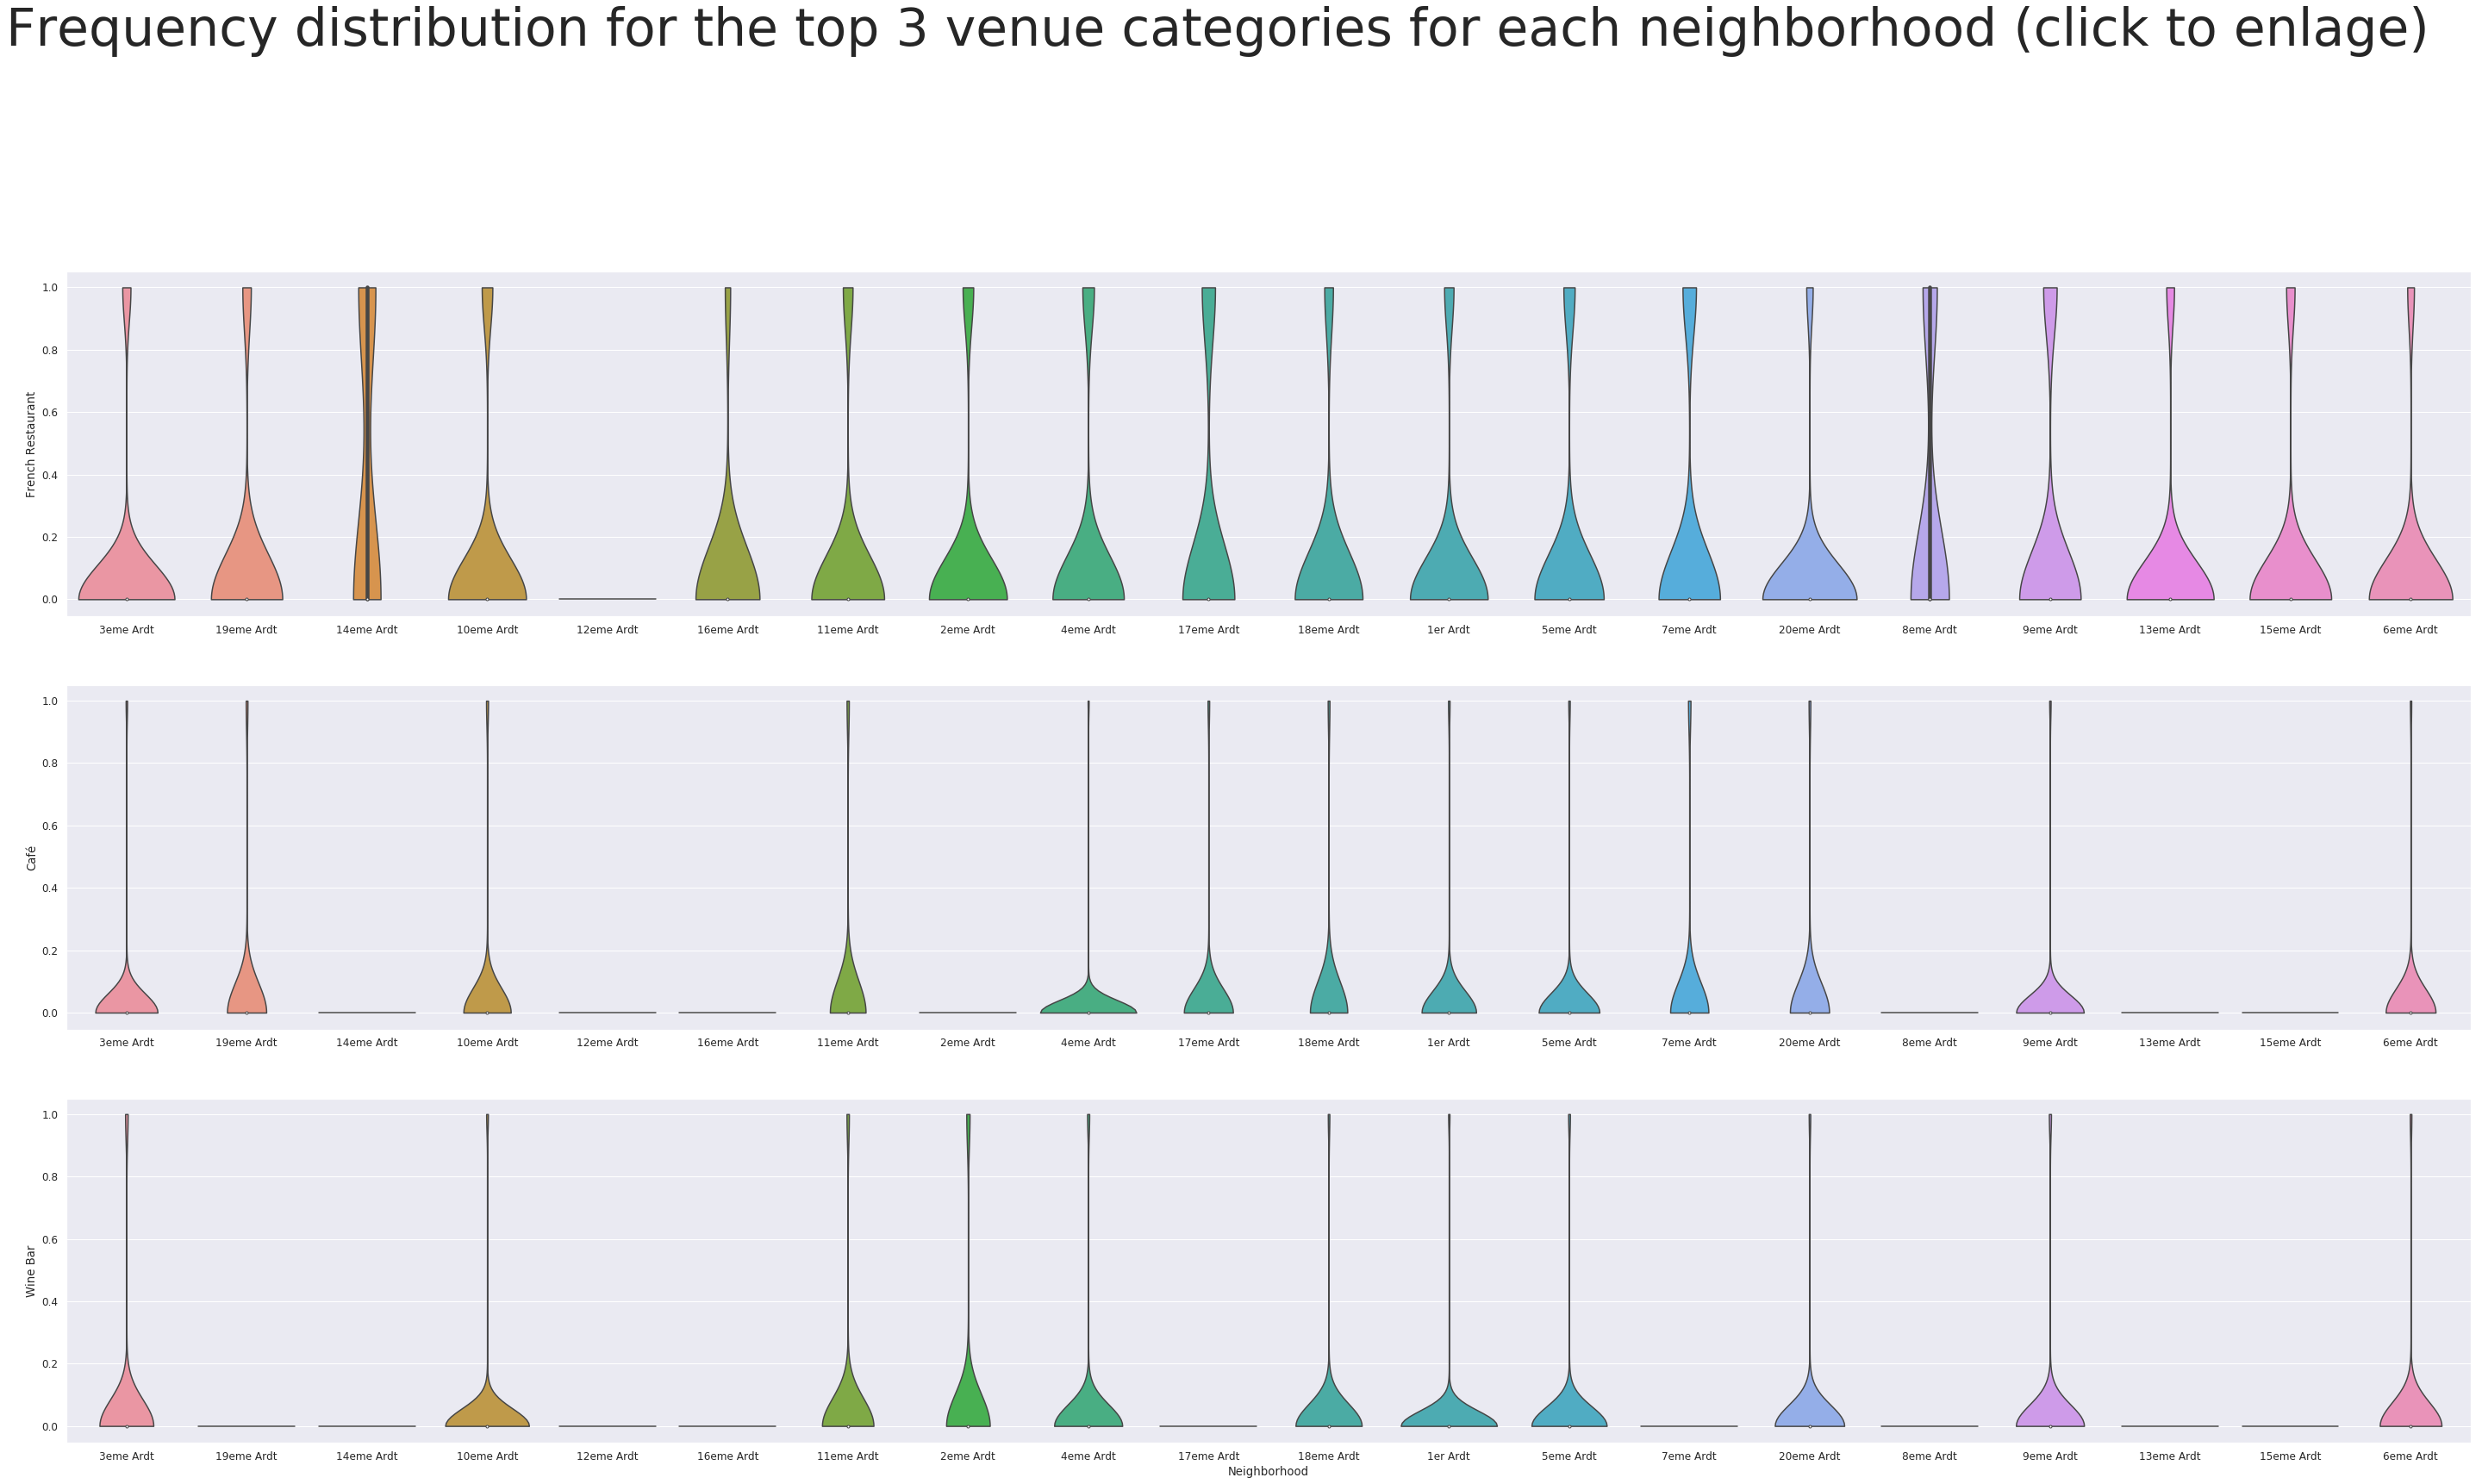

In [54]:
# Categorical plot
# Explore a plot of this data (a violin plot is used which is a density estimation of the underlying distribution).
# The top 3 venue types as specified by the client for each neighborhood are used for the plotting.

import seaborn as sns

fig = plt.figure(figsize=(50,25))
sns.set(font_scale=1.1)

ax = plt.subplot(3,1,1)
sns.violinplot(x="Neighborhood", y="French Restaurant", data=paris_onehot, cut=0);
plt.xlabel("")

ax = plt.subplot(3,1,2)
sns.violinplot(x="Neighborhood", y="Café", data=paris_onehot, cut=0);
plt.xlabel("")

plt.subplot(3,1,3)
sns.violinplot(x="Neighborhood", y="Wine Bar", data=paris_onehot, cut=0);

ax.text(-1.0, 3.1, 'Frequency distribution for the top 3 venue categories for each neighborhood (click to enlage)', fontsize=60)
plt.savefig ("Distribution_Frequency_Venues_3_categories.png", dpi=240)
plt.show()

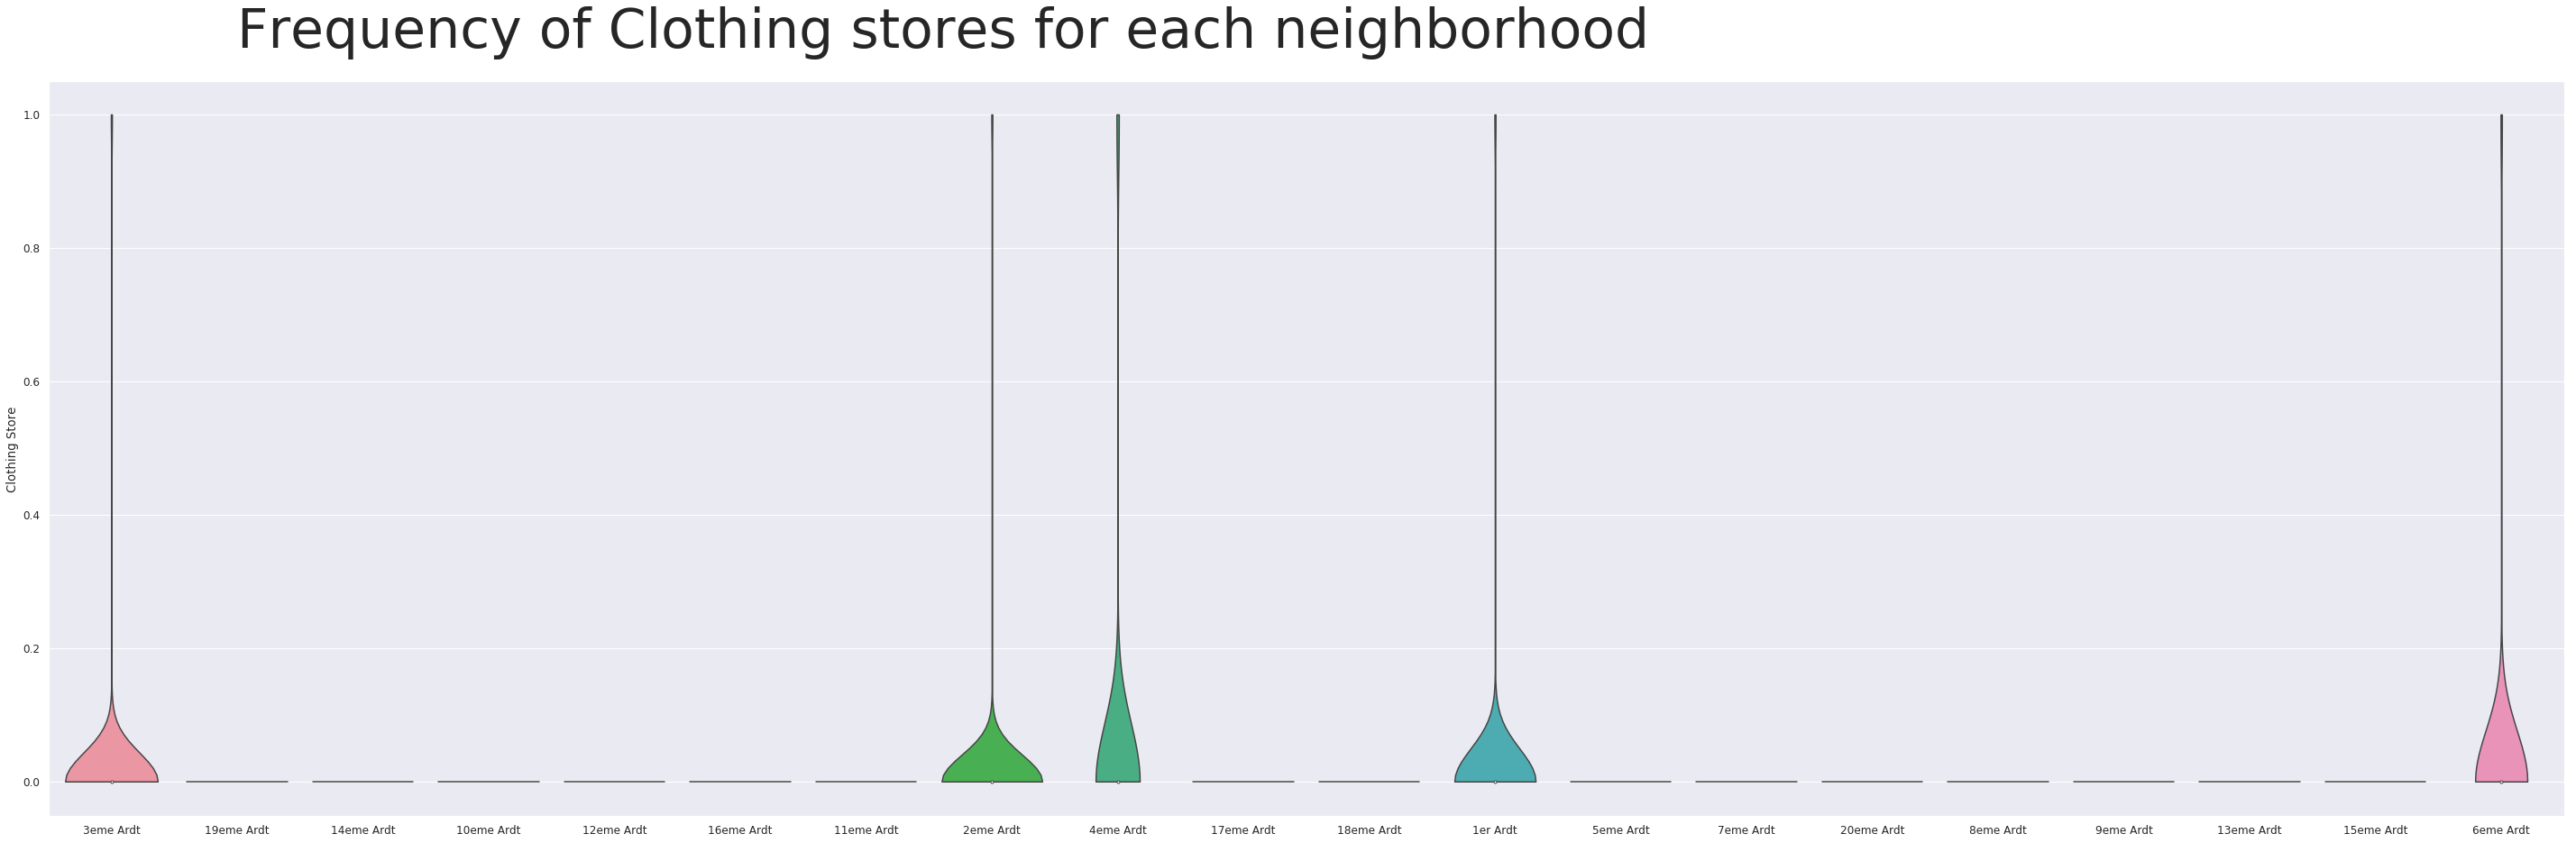

In [55]:
# Add the Clothing_Store to explore this category
import seaborn as sns

fig = plt.figure(figsize=(50,15))
sns.set(font_scale=1.1)

ax = plt.subplot(1,1,1)
sns.violinplot(x="Neighborhood", y="Clothing Store", data=paris_onehot, cut=0);
plt.xlabel("")

ax.text(1.0, 1.1, 'Frequency of Clothing stores for each neighborhood', fontsize=60)
plt.savefig ("Distribution_Frequency_Clothing_Venues.png", dpi=240)
plt.show()

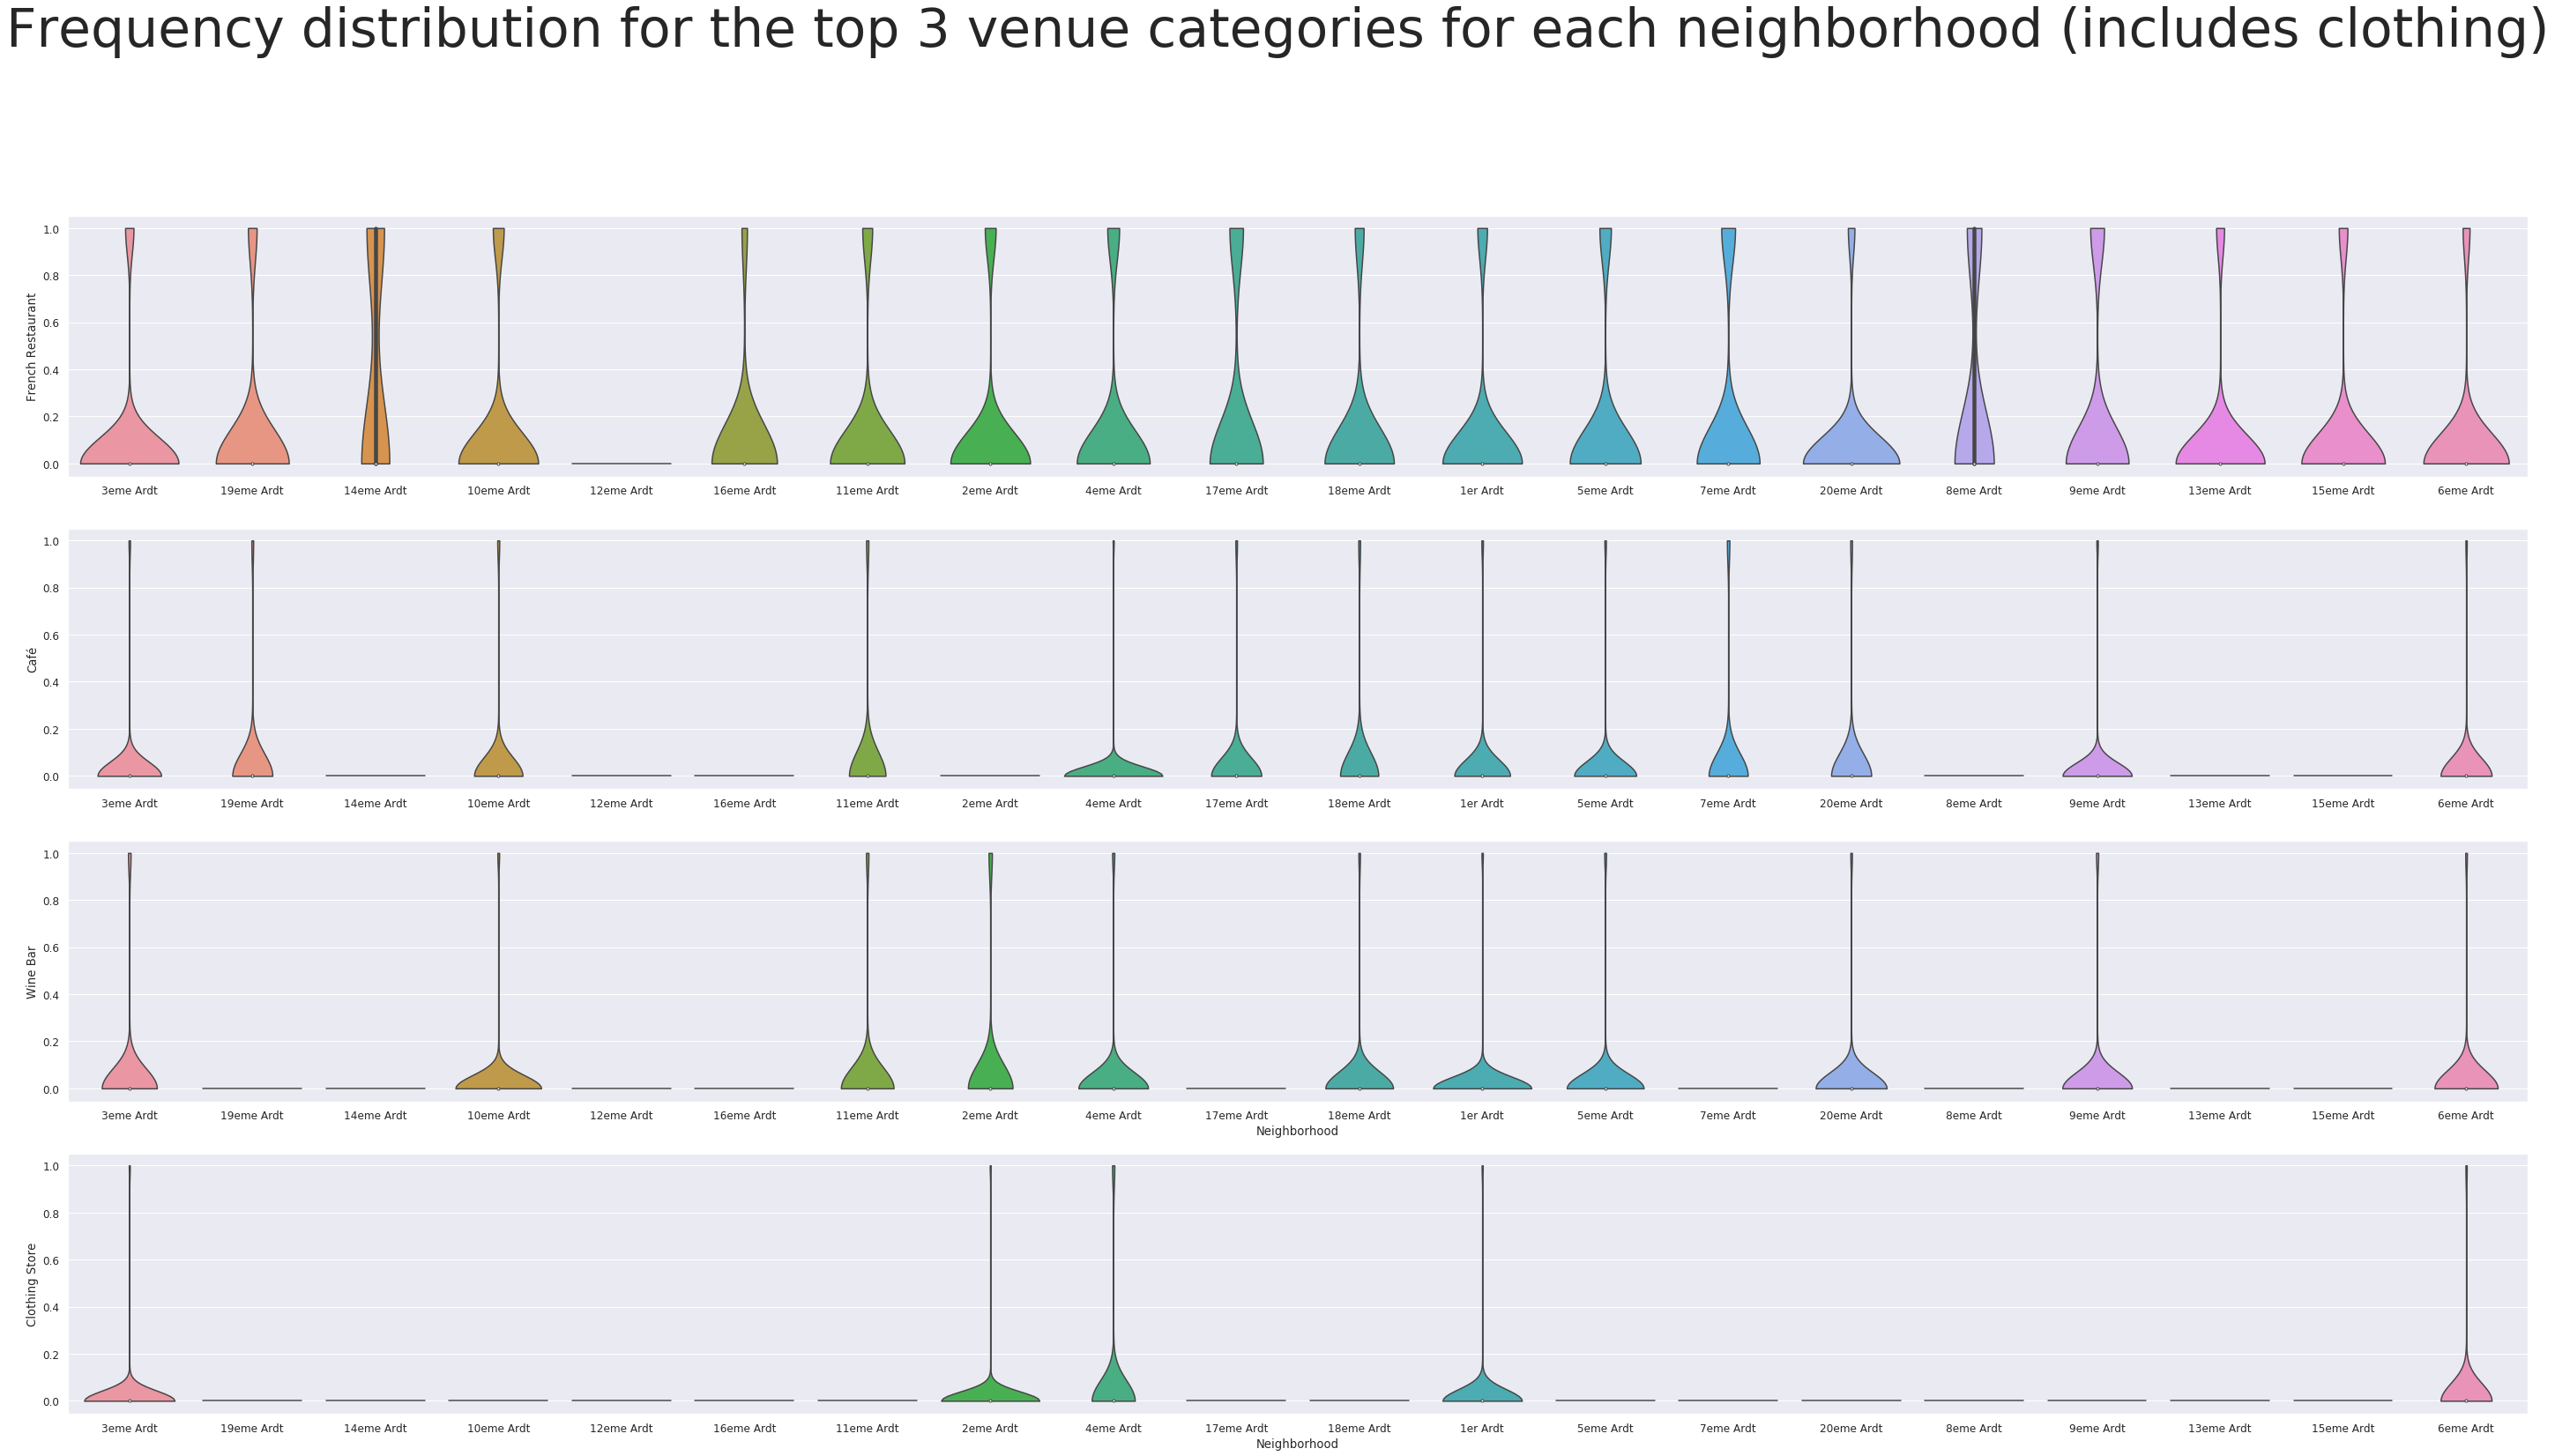

In [56]:

import seaborn as sns

fig = plt.figure(figsize=(50,25))
sns.set(font_scale=1.1)

ax = plt.subplot(4,1,1)
sns.violinplot(x="Neighborhood", y="French Restaurant", data=paris_onehot, cut=0);
plt.xlabel("")

ax = plt.subplot(4,1,2)
sns.violinplot(x="Neighborhood", y="Café", data=paris_onehot, cut=0);
plt.xlabel("")

plt.subplot(4,1,3)
sns.violinplot(x="Neighborhood", y="Wine Bar", data=paris_onehot, cut=0);

plt.subplot(4,1,4)
sns.violinplot(x="Neighborhood", y="Clothing Store", data=paris_onehot, cut=0);

ax.text(-1.0, 3.1, 'Frequency distribution for the top 3 venue categories for each neighborhood (includes clothing)', fontsize=60)
plt.savefig ("Distribution_Frequency_Venues_3_categories_clothing.png", dpi=240)
plt.show()

In [57]:
# The csv of the 3 chosen prospective neighborhoods was uploaded to GitHub for access and reference
# Download and put into a new dataframe called chosen_districts

chosen_districts = pd.read_csv('https://raw.githubusercontent.com/AR-data-science/Coursera_Capstone/master/Week%205/Chosen.csv')
chosen_districts


,Arrondissement_Num,Neighborhood,French_Name,Latitude,Longitude
0,3,Temple,3eme Ardt,48.862872,2.360001
1,4,Hotel-de-Ville,4eme Ardt,48.854341,2.357630
2,6,Luxembourg,6eme Ardt,48.849130,2.332898


In [58]:
# Create a folium map of Paris with the 3 neighborhoods superimposed on the map
map_chosen_districts = folium.Map(location=[latitude, longitude], zoom_start=13)

# add markers to map
for lat, lng, label in zip(chosen_districts['Latitude'], chosen_districts['Longitude'], chosen_districts['French_Name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=45,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.2,
        parse_html=False).add_to(map_chosen_districts)  
    
map_chosen_districts

# Report

These districts are all very centrally located in the circular arrangement of Paris's districts. We have narrowed the search area down significantly from 20 potential districts to 3 that should suit the client's retail business.

All very centrally located in the circular arrangement of Paris's districts. Locations fitting the criteria for popular venues would normally be in central locations in many cities of the world.

From this visualisation it is clear that on a practical leve,l the circle of the 20 districs is very large. We have narrowed the search area down significantly from 20 potential districts to 3 that should suit the client's retail business.

We have made inferences from the data in making the location recommendations managing tosteer a course for the location selection of new stores (i) to meet the criteria of being in neighbourhoods that are lively with abundant leisure venues, and (ii) to narrow the search down to just a few of the main areas that are best suited to match the criteria.

in clonclusion, the analysis and results are not an end point, but rather a starting point that will guide the next part of the process to find specific store locations. The next part will involve domain knowledge of the industry, and perhaps, of the city itself. But the data analysis and resulting recommendations have greatly narrowed down the best district options based on data and what we can infer from it.

Without leveraging data to make focussed decisions, the process could have been drawn out and resulted in new stores opening in sub-standard areas for this retailer. Data has helped to provide a better strategy and way forward, these data-driven decisions will lead to a better solution in the end.
